In [37]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [38]:
image_path1 = gdal.Open("C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project_Doc\\Docs\\NDVI-Data\\NDVI_RUH-B4-B8_2019-01-14.tif")
band1 = image_path1.GetRasterBand(1)
ndvi1 = band1.ReadAsArray()
ndvi_processed_1 = np.nan_to_num(ndvi1, nan=0.01)

image_path2 = gdal.Open("C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project_Doc\\Docs\\NDVI-Data\\NDVI_RUH-B4-B8_2023-01-23.tif")
band2 = image_path2.GetRasterBand(1)
ndvi2 = band2.ReadAsArray()
ndvi_processed_2 = np.nan_to_num(ndvi2, nan=0.01)

In [39]:
print(ndvi_processed_2)

[[0.01       0.01       0.01       ... 0.01       0.01       0.01      ]
 [0.01       0.01       0.01       ... 0.01       0.01       0.01      ]
 [0.01       0.01       0.01       ... 0.01       0.01       0.01      ]
 ...
 [0.45226333 0.45226333 0.41222066 ... 0.06528138 0.06528138 0.06475069]
 [0.49273276 0.36355668 0.36355668 ... 0.06728779 0.06728779 0.0621118 ]
 [0.01       0.4103103  0.4103103  ... 0.06503364 0.06503364 0.06243532]]


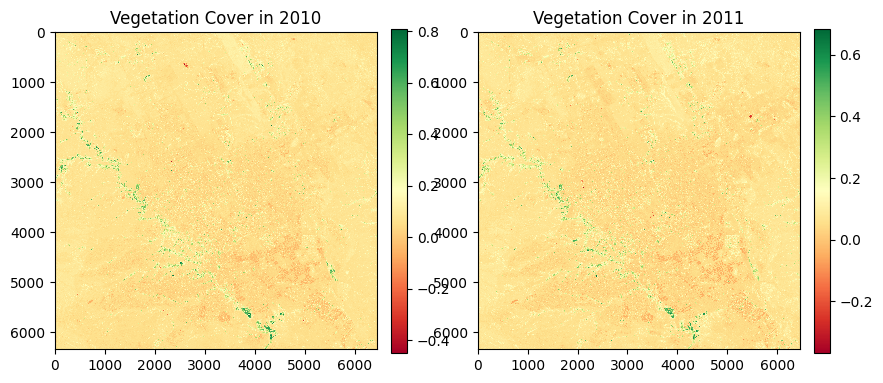

In [40]:
# Plotting the vegetation cover for 2010 and 2011 side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Vegetation cover for 2010
cax_2010 = axs[0].imshow(ndvi_processed_1, cmap='RdYlGn', interpolation='nearest')
fig.colorbar(cax_2010, ax=axs[0], fraction=0.046, pad=0.04)
axs[0].set_title('Vegetation Cover in 2010')


# Vegetation cover for 2011
cax_2011 = axs[1].imshow(ndvi_processed_2, cmap='RdYlGn', interpolation='nearest')
fig.colorbar(cax_2011, ax=axs[1], fraction=0.046, pad=0.04)
axs[1].set_title('Vegetation Cover in 2011')


plt.show()


In [41]:
from matplotlib.colors import ListedColormap

def categorize_change(value):
    if 0 < value <= 0.25:
        return 1
    elif 0.25 < value <= 0.5:
        return 2
    elif 0.5 < value <= 0.75:
        return 3
    elif 0.75 < value <= 1:
        return 4
    elif -0.25 <= value < 0:
        return -1
    elif -0.5 <= value < -0.25:
        return -2
    elif -0.75 <= value < -0.5:
        return -3
    elif -1 <= value < -0.75:
        return -4
    else:
        return 0
    
# Adjusted color mapping to include darker shades for higher absolute values
colors = ['#FF0505', '#FA6A6A', '#FFC8C8', 'black', '#9AFFB4', '#40BA45', '#183E0C']  # Dark red, red, orange, black, light green, green, dark green
cmap = ListedColormap(colors)
bounds = [-4.5, -3.5, -2.5, -1.5, 0.5, 1.5, 2.5, 3.5, 4.5]  # Adjusted to include bounds for all categories
norm = plt.Normalize(min(bounds), max(bounds))

# Assuming ndvi_processed_1 and ndvi_processed_2 are defined earlier in your code
# Setting the threshold
threshold = 0.111

# Calculating changes where either of the values is greater than the threshold
change_detection = np.where((ndvi_processed_1 > threshold) | (ndvi_processed_2 > threshold), ndvi_processed_2 - ndvi_processed_1, 0)

# Vectorizing the categorize_change function to apply it element-wise
categorize_change_vectorized = np.vectorize(categorize_change)

# Applying the categorization to the change_detection array
categorized_changes = categorize_change_vectorized(change_detection)

print(categorized_changes)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]]


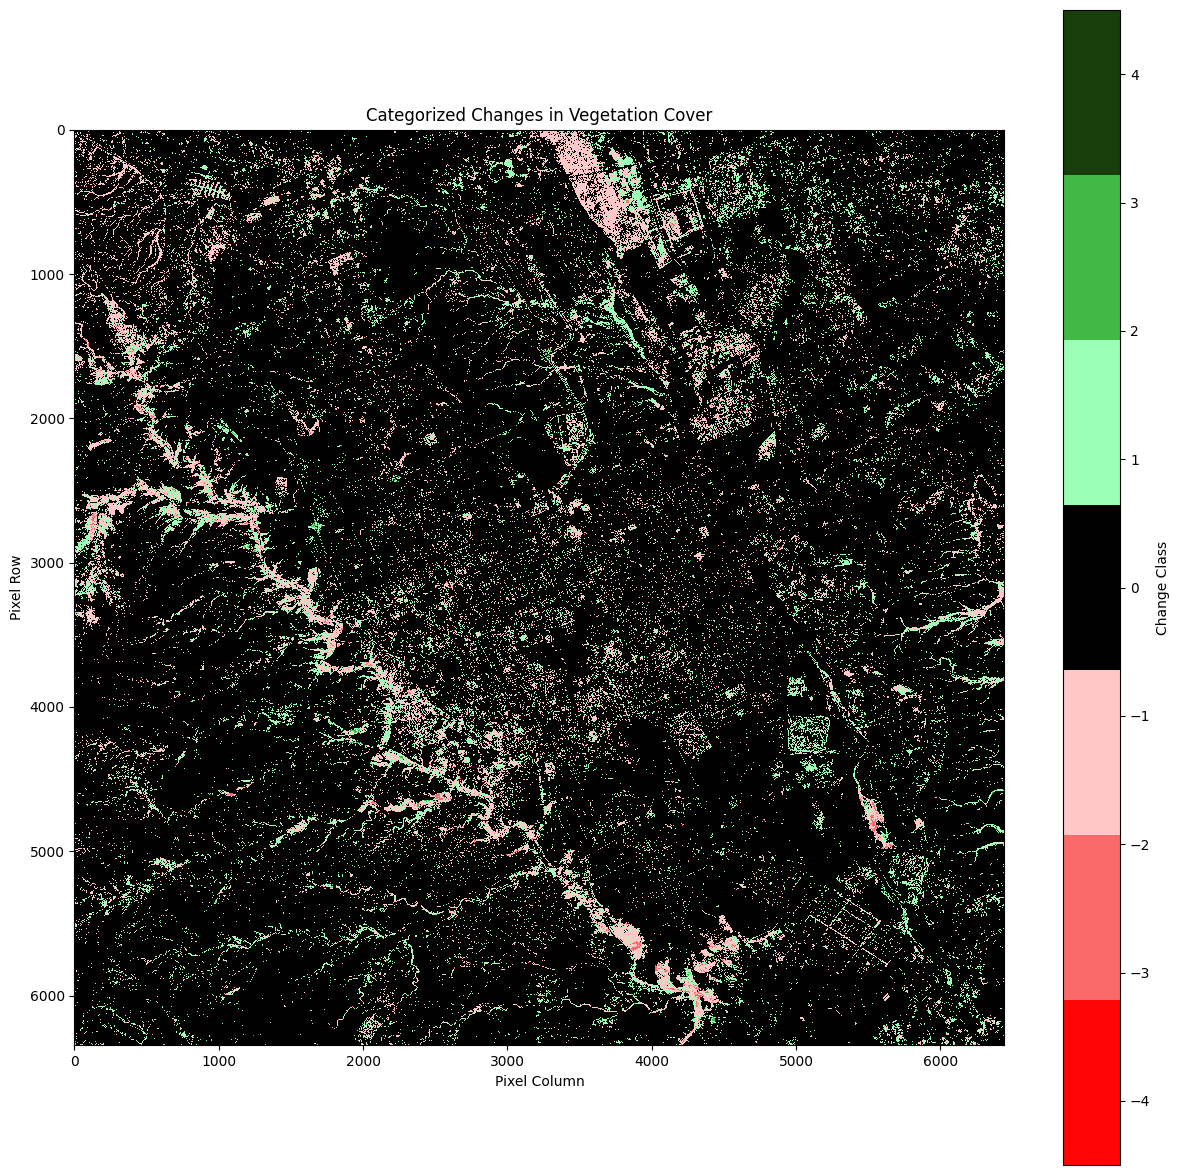

In [42]:
# Plotting
plt.figure(figsize=(15, 15))
plt.imshow(categorized_changes, cmap=cmap, norm=norm, interpolation='nearest')
plt.colorbar(ticks=np.arange(-4, 5), label='Change Class')  # Adjusted tick marks to include all categories
plt.title('Categorized Changes in Vegetation Cover')
plt.xlabel('Pixel Column')
plt.ylabel('Pixel Row')
plt.grid(False)
plt.show()

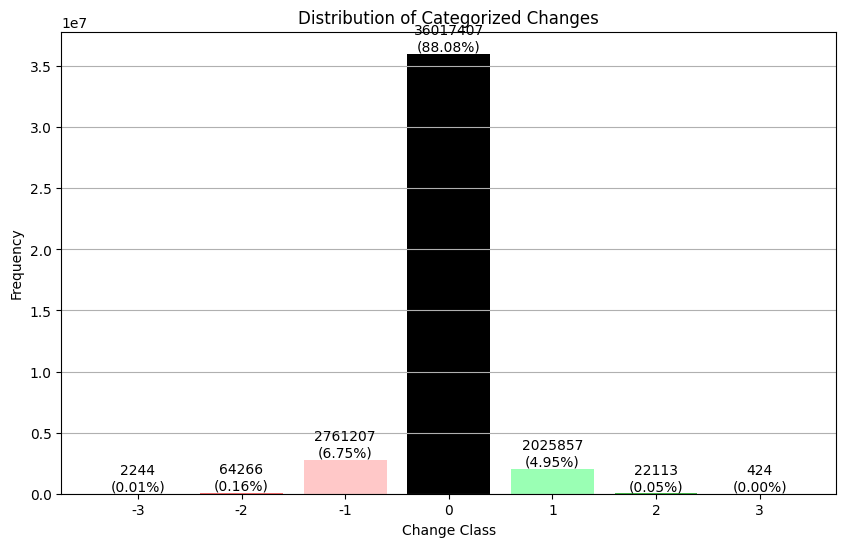

In [43]:
# Calculate the distribution of categorized changes
(unique, counts) = np.unique(categorized_changes, return_counts=True)
frequencies = dict(zip(unique, counts))
total_pixels = np.sum(counts)

# Prepare the data for plotting
categories = ['-3', '-2', '-1', '0', '1', '2', '3']
counts = [frequencies.get(category, 0) for category in range(-3, 4)]

# Plotting the distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color = ['#FF0505', '#FA6A6A', '#FFC8C8', 'black', '#9AFFB4', '#40BA45', '#183E0C'])
plt.xlabel('Change Class')
plt.ylabel('Frequency')
plt.title('Distribution of Categorized Changes')
plt.grid(axis='y')

# Adding the count and percentage above each bar
for bar in bars:
    yval = bar.get_height()
    percentage = f'{yval / total_pixels * 100:.2f}%'
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'{yval}\n({percentage})', ha='center', va='bottom')

# Show the plot
plt.show()